# Script that computes meridional density gradient along DWBC

In [137]:
from netCDF4 import Dataset
import os
import numpy as np
import matplotlib.pyplot as plt
import decomp_alllevels as deco
from imp import reload
import write_netCDF as write
import tools
import numpy.ma as ma
import xz_tools

os.chdir("/Users/veitlueschow/data/STORM/tm2001-2010")

In [138]:
rho = tools.netread_data('rhopoto_tm2001-2010_box.nc','rhopoto') # read in rho
vel = tools.netread_data('vel_hor_mag_box.nc','vke') # read in vel horizontal

lat,lon,depth = tools.netread_grid('rhopoto_tm2001-2010_box.nc','lat','lon','depth_14')

In [197]:
reload(xz_tools)

<module 'xz_tools' from '/Users/veitlueschow/mod_data/xz_tools.py'>

In [198]:
shift = np.arange(7)-3
fits = []
grads = []
for i in range(shift.shape[0]):
    rho_fit,rho_y,y,m = xz_tools.meri_fit(vel,rho,lat,depth,shift[i])
    fits.append(rho_fit)
    grads.append(m)
    if shift[i] == 0:
        rho0 = rho_y.copy()
    print(m)


/Users/veitlueschow/mod_data/xz_tools.py:132: UserWarning: Warning: converting a masked element to nan.
  rho_m[k,j] = rho[k,j,tmp3[k,j]+shift]


4.23230189556
4.25282394258
4.3411210555
4.07700408559
3.82047488738
3.59343654504
3.39595314655


In [199]:
fits = np.array(fits)
print(fits.shape)

(7, 605)


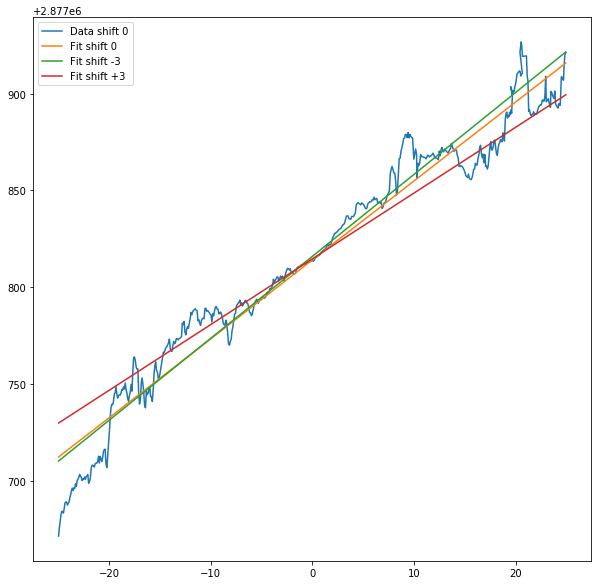

In [200]:
plt.figure(figsize=(10,10))
plt.plot(y,rho0,label="Data shift 0")
plt.hold
plt.plot(y,fits[3],label="Fit shift 0")
plt.plot(y,fits[0],label="Fit shift -3")
plt.plot(y,fits[6],label="Fit shift +3")
plt.legend()
plt.show()